# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# for GPU AWS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                # testing tensorflow-gup in the AWS instance
#import tensorflow as tf
#tfs = tf.Session(config=tf.ConfigProto(log_device_placement=True))
#tfs.list_devices() 
#import platform
#print(platform.python_version())

# Load pickled data
import pickle
# Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_rgb, y_train = train['features'], train['labels']
X_valid_rgb, y_valid = valid['features'], valid['labels']
X_test_rgb, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = X_train_rgb.shape[0]
# Number of testing examples.
n_test = X_test_rgb.shape[0]
# Number of validation examples
n_validation = X_valid_rgb.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train_rgb.shape[1:]
# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training set =", n_train)
print("Number of testing set =", n_test)
print("Number of validation set =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training set = 34799
Number of testing set = 12630
Number of validation set = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

randomly pick from train set


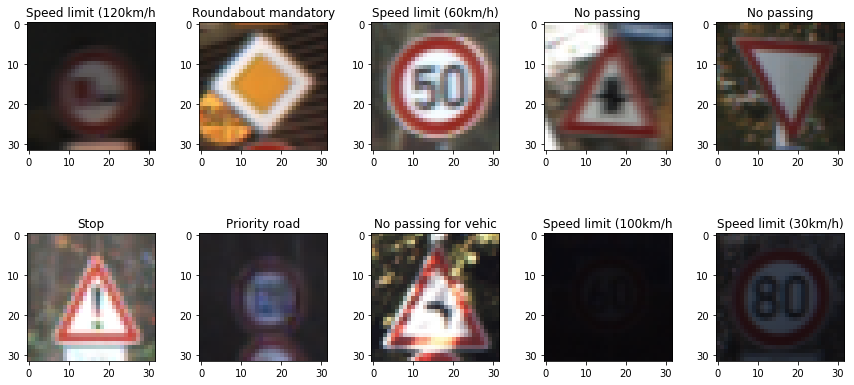

In [46]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import csv

# https://stackoverflow.com/questions/17210646/python-subplot-within-a-loop-first-panel-appears-in-wrong-position
def plot_sign_images(img, nrows, ncols, label, cmap=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 6))
    axs = axs.ravel() 
    for index, title in zip(range(len(img)), img):
        axs[index].imshow(img[title].squeeze(), cmap=cmap)
        if label is not None:
            axs[index].set_title(label[index])
        else:
            axs[index].set_title(title)
    plt.tight_layout()


label_name = np.genfromtxt('./signnames.csv', skip_header=1,
                           dtype=[('myint','i8'), ('mystring','S20')], 
                           delimiter=',')

# sample images from the dataset to display
print('randomly pick from train set')
plt_sz = 10
plt_per_line = 5
images_select = {}
labels_select = {}
index_select = []
for i in range(plt_sz):
    index = random.randint(0, n_train-1)  
    index_select.append(index)
    labels_select[i] = label_name[y_train[index]][1].decode('ascii')
    images_select[i] = X_train_rgb[index]
    
plot_sign_images(images_select, int(plt_sz/plt_per_line), plt_per_line , labels_select)

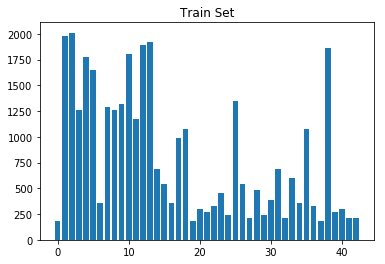

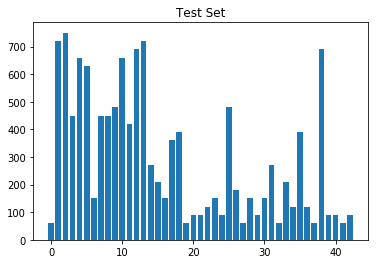

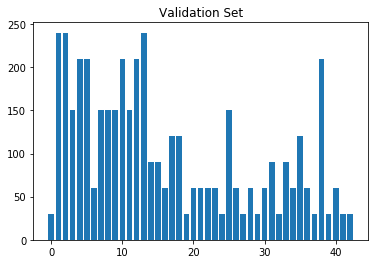

In [4]:
# check the distributions of the labels among three subsets of the dataset.
uni_train, c_train = np.unique(y_train, return_counts=True)
plt.bar(uni_train, c_train)
plt.title("Train Set") 
plt.show()

uni_test, c_test = np.unique(y_test, return_counts=True)
plt.bar(uni_test, c_test)
plt.title("Test Set") 
plt.show()

uni_valid, c_valid = np.unique(y_valid, return_counts=True)
plt.bar(uni_valid, c_valid)
plt.title("Validation Set") 
plt.show()

In [5]:
def stat_data_set(set_data):
    sign_class, _, sign_class_sample = np.unique(set_data, return_index=True, return_counts = True)
    for c, s in zip(sign_class, sign_class_sample):
        print('label ', c, label_name[c], ' sample count ', s)

print('stat for train set')
stat_data_set(y_train)

print('stat for test set')
stat_data_set(y_test)

print('stat for valid set')
stat_data_set(y_valid)

stat for train set
label  0 (0, b'Speed limit (20km/h)')  sample count  180
label  1 (1, b'Speed limit (30km/h)')  sample count  1980
label  2 (2, b'Speed limit (50km/h)')  sample count  2010
label  3 (3, b'Speed limit (60km/h)')  sample count  1260
label  4 (4, b'Speed limit (70km/h)')  sample count  1770
label  5 (5, b'Speed limit (80km/h)')  sample count  1650
label  6 (6, b'End of speed limit (')  sample count  360
label  7 (7, b'Speed limit (100km/h')  sample count  1290
label  8 (8, b'Speed limit (120km/h')  sample count  1260
label  9 (9, b'No passing')  sample count  1320
label  10 (10, b'No passing for vehic')  sample count  1800
label  11 (11, b'Right-of-way at the ')  sample count  1170
label  12 (12, b'Priority road')  sample count  1890
label  13 (13, b'Yield')  sample count  1920
label  14 (14, b'Stop')  sample count  690
label  15 (15, b'No vehicles')  sample count  540
label  16 (16, b'Vehicles over 3.5 me')  sample count  360
label  17 (17, b'No entry')  sample count  

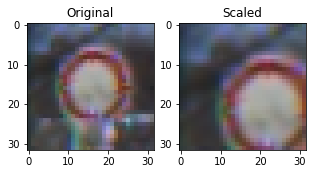

In [6]:
import cv2        
def transform_image(img):
    fx = random.uniform(1.1, 1.5)
    fy = fx
    return cv2.resize(img,None,fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)[0:32, 0:32,:]

fig, axes = plt.subplots(ncols=2, figsize=(5,10))
randomIdx = random.randint(0, len(X_train_rgb))
axes[0].imshow(X_train_rgb[randomIdx])
axes[0].set_title('Original')
axes[1].imshow(transform_image(X_train_rgb[randomIdx]))
axes[1].set_title('Scaled')


label  0 (0, b'Speed limit (20km/h)')  sample count  180
label  1 (1, b'Speed limit (30km/h)')  sample count  1980
label  2 (2, b'Speed limit (50km/h)')  sample count  2010
label  3 (3, b'Speed limit (60km/h)')  sample count  1260
label  4 (4, b'Speed limit (70km/h)')  sample count  1770
label  5 (5, b'Speed limit (80km/h)')  sample count  1650
label  6 (6, b'End of speed limit (')  sample count  360
label  7 (7, b'Speed limit (100km/h')  sample count  1290
label  8 (8, b'Speed limit (120km/h')  sample count  1260
label  9 (9, b'No passing')  sample count  1320
label  10 (10, b'No passing for vehic')  sample count  1800
label  11 (11, b'Right-of-way at the ')  sample count  1170
label  12 (12, b'Priority road')  sample count  1890
label  13 (13, b'Yield')  sample count  1920
label  14 (14, b'Stop')  sample count  690
label  15 (15, b'No vehicles')  sample count  540
label  16 (16, b'Vehicles over 3.5 me')  sample count  360
label  17 (17, b'No entry')  sample count  990
label  18 (18, 

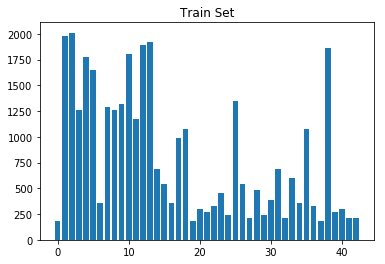

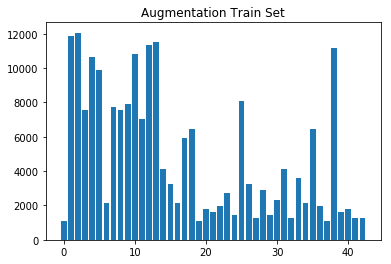

label  0 (0, b'Speed limit (20km/h)')  sample count  1080
label  1 (1, b'Speed limit (30km/h)')  sample count  11880
label  2 (2, b'Speed limit (50km/h)')  sample count  12060
label  3 (3, b'Speed limit (60km/h)')  sample count  7560
label  4 (4, b'Speed limit (70km/h)')  sample count  10620
label  5 (5, b'Speed limit (80km/h)')  sample count  9900
label  6 (6, b'End of speed limit (')  sample count  2160
label  7 (7, b'Speed limit (100km/h')  sample count  7740
label  8 (8, b'Speed limit (120km/h')  sample count  7560
label  9 (9, b'No passing')  sample count  7920
label  10 (10, b'No passing for vehic')  sample count  10800
label  11 (11, b'Right-of-way at the ')  sample count  7020
label  12 (12, b'Priority road')  sample count  11340
label  13 (13, b'Yield')  sample count  11520
label  14 (14, b'Stop')  sample count  4140
label  15 (15, b'No vehicles')  sample count  3240
label  16 (16, b'Vehicles over 3.5 me')  sample count  2160
label  17 (17, b'No entry')  sample count  5940
lab

In [9]:
# augmented data process
def genData(input_data, input_labels, n_classes):
    hist, _ = np.histogram(input_labels, n_classes, normed=True)
    sLabel = []
    for index, v in enumerate(hist):
        sLabel.append(index)
    newInput = []
    newLabels = []
    for index, label in enumerate(input_labels):
        if label in sLabel:
            for i in range(0, 5):  # generate 5 data samples             
                newLabels.append(label)
                img_ = transform_image(input_data[index])
                newInput.append(img_)
    its = np.array(newInput)
    return (np.array(newInput), np.array(newLabels))

X_train_rgb_new, y_train_new = genData(X_train_rgb, y_train, 43)
stat_data_set(y_train)
stat_data_set(y_train_new)
print(X_train_rgb.shape)
print(X_train_rgb_new.shape)
X_train_rgb_aug = np.concatenate((X_train_rgb, X_train_rgb_new), axis=0)
y_train_aug = np.concatenate((y_train, y_train_new), axis=0)


uni_train, c_train = np.unique(y_train, return_counts=True)
plt.bar(uni_train, c_train)
plt.title("Train Set") 
plt.show()

uni_train_aug, c_train_aug = np.unique(y_train_aug, return_counts=True)
plt.bar(uni_train_aug, c_train_aug)
plt.title("Augmentation Train Set") 
plt.show()

stat_data_set(y_train_aug)
 



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from math import ceil
from sklearn.utils import shuffle
import cv2 
# Convert to grayscale
X_train_gray = np.sum(X_train_rgb/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test_rgb/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid_rgb/3, axis=3, keepdims=True)
X_train_gray_aug =  np.sum(X_train_rgb_aug/3, axis=3, keepdims=True)

print(X_train_rgb.shape)  
print(X_train_gray.shape)
print(X_train_gray_aug.shape)
                      

(34799, 32, 32, 3)
(34799, 32, 32, 1)
(208794, 32, 32, 1)


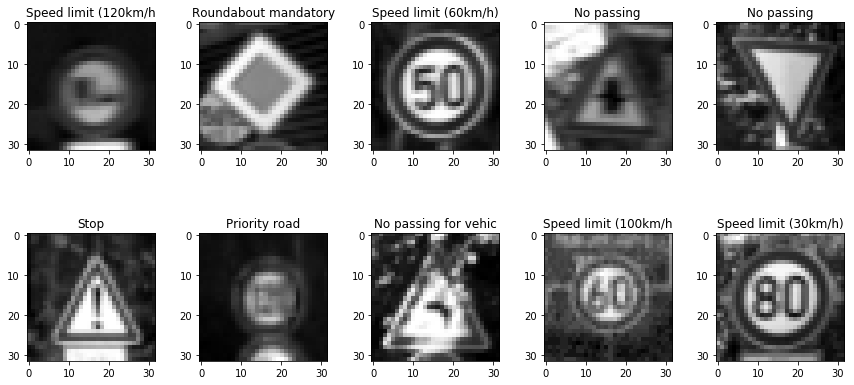

In [47]:
 
images_gray = {}
labels_gray = {}
for i in range(len(index_select)):
    index = index_select[i] 
    #print(label_name[y_train[index]])
    labels_gray[i] = label_name[y_train[index]][1].decode('ascii')
    images_gray[i] = X_train_gray[index]


plot_sign_images(images_gray, int(plt_sz/plt_per_line), plt_per_line , labels_gray, cmap='gray')





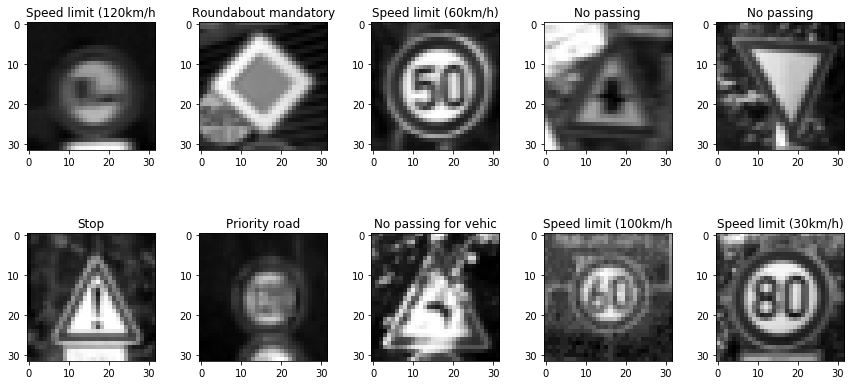

In [48]:
# normalized the data set
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128 
X_valid_gray_norm = (X_valid_gray-128)/128
X_train_gray_aug_norm= (X_train_gray_aug-128)/128

images_gray_norm = {}
labels_gray_norm = {}
for i in range(len(index_select)):
    index = index_select[i] 
    labels_gray_norm[i] = label_name[y_train[index]][1].decode('ascii')
    images_gray_norm[i] = X_train_gray_norm[index]

plot_sign_images(images_gray_norm, int(plt_sz/plt_per_line), plt_per_line , labels_gray_norm, cmap='gray')

#### Model Architecture

## LeNet Model
The following figure is the original LeNet design from Yann LaCun's paper. 

![image](reports/lenet.png)


In this project, the filter depths for the convolution layers are increased.

Besides, dropout method is added for the fully connected layers.



In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob, depth, n_class):
    # reference: https://github.com/zhuangh/CarND-LeNet-Lab/blob/master/LeNet-Lab.ipynb
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32xdepth. Output = 28x28xfilter_depth.
    filter_depth = 10 #16 #6
    conv1_Wt = tf.Variable(tf.truncated_normal(shape=(5,5, depth, filter_depth), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(filter_depth))
    conv1 = tf.nn.conv2d(x, conv1_Wt, strides=[1,1,1,1], padding='VALID')+ conv1_b
    # Activation.
    conv1_relu = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14xfilter_depth.
    conv1_maxpool = tf.nn.max_pool(conv1_relu, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    
    # Layer 2: Convolutional. Output = 10x10xfilter_depth_2.
    filter_depth_2 = 40 #64 #16
    conv2_Wt = tf.Variable(tf.truncated_normal(shape=(5,5, filter_depth, filter_depth_2), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(filter_depth_2))
    conv2 = tf.nn.conv2d(conv1_maxpool, conv2_Wt, strides=[1,1,1,1], padding='VALID')+ conv2_b
    # Activation.
    conv2_relu = tf.nn.relu(conv2)

    # Pooling. Input = 10x10xilter_depth_2. Output = 5x5xilter_depth_2.
    conv2_maxpool = tf.nn.max_pool(conv2_relu, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5xilter_depth_2. Output = 400.
    fl = flatten(conv2_maxpool)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # input ilter_depth_2*25
    s_input = filter_depth_2*25 # 400
    s_output = 240 # 120
    fl3_Wt = tf.Variable(tf.truncated_normal(shape=(s_input, s_output), mean = mu, stddev = sigma))
    fl3_b = tf.Variable(tf.zeros(s_output))
    fl3 = tf.matmul(fl, fl3_Wt) + fl3_b
    
    # Activation.
    fl3_relu = tf.nn.relu(fl3)
    fl3_relu = tf.nn.dropout(fl3_relu, keep_prob)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fl4_Wt = tf.Variable(tf.truncated_normal(shape=(s_output, 84), mean = mu, stddev = sigma))
    fl4_b = tf.Variable(tf.zeros(84))
    fl4 = tf.matmul(fl3_relu, fl4_Wt) + fl4_b
    
    # Activation.
    fl4_relu = tf.nn.relu(fl4)
    fl4_relu = tf.nn.dropout(fl4_relu, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = n_class.
    fl5_Wt = tf.Variable(tf.truncated_normal(shape=(84, n_class), mean = mu, stddev = sigma))
    fl5_b = tf.Variable(tf.zeros(n_class))
    logits = tf.matmul(fl4_relu, fl5_Wt) + fl5_b

    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [23]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# Ref: https://github.com/zhuangh/CarND-LeNet-Lab/blob/master/LeNet-Lab.ipynb

X_train = X_train_gray_aug_norm
y_train = y_train_aug

X_test = X_test_gray_norm
X_valid = X_valid_gray_norm
print(X_train.shape)
image_channels = X_train.shape[3]
print("Image channels used:", image_channels)

x = tf.placeholder(tf.float32, (None, 32, 32, image_channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

EPOCHS = 51 #51#150 #50
BATCH_SIZE = 128 #156
rate = 0.0008 #08 #0.00097

logits = LeNet(x, keep_prob, depth=image_channels, n_class=n_classes)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

prediction = tf.argmax(logits,1)

correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

(208794, 32, 32, 1)
Image channels used: 1


In [24]:
# evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    #print(total_accuracy)
    return total_accuracy / num_examples

In [25]:
# training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_train = len(X_train)
    print("Training...")   
    train_acc_fig = []
    valid_acc_fig = []
    test_acc_fig = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        train_acc = evaluate(X_train, y_train)
        train_acc_fig.append(train_acc)
        valid_acc = evaluate(X_valid, y_valid)
        valid_acc_fig.append(valid_acc)
        test_acc = evaluate(X_test, y_test)
        test_acc_fig.append(test_acc)
        print("Epoch {}:".format(i))
        print("Train Accuracy = {:.5f}".format(train_acc))
        print("Validation Accuracy = {:.5f}".format(valid_acc))
        print("Test Accuracy = {:.5f}".format(test_acc))    
        #print()
    saver.save(sess, './lenet')
    print("Model saved")

Training...
Epoch 0:
Train Accuracy = 0.93006
Validation Accuracy = 0.81066
Test Accuracy = 0.80721
Epoch 1:
Train Accuracy = 0.97401
Validation Accuracy = 0.88027
Test Accuracy = 0.87641
Epoch 2:
Train Accuracy = 0.98467
Validation Accuracy = 0.89841
Test Accuracy = 0.89691
Epoch 3:
Train Accuracy = 0.99003
Validation Accuracy = 0.90317
Test Accuracy = 0.90792
Epoch 4:
Train Accuracy = 0.99312
Validation Accuracy = 0.93220
Test Accuracy = 0.91932
Epoch 5:
Train Accuracy = 0.99538
Validation Accuracy = 0.93265
Test Accuracy = 0.92597
Epoch 6:
Train Accuracy = 0.99534
Validation Accuracy = 0.94127
Test Accuracy = 0.92644
Epoch 7:
Train Accuracy = 0.99693
Validation Accuracy = 0.93946
Test Accuracy = 0.93017
Epoch 8:
Train Accuracy = 0.99403
Validation Accuracy = 0.93039
Test Accuracy = 0.92486
Epoch 9:
Train Accuracy = 0.99776
Validation Accuracy = 0.95011
Test Accuracy = 0.92803
Epoch 10:
Train Accuracy = 0.99805
Validation Accuracy = 0.95079
Test Accuracy = 0.93777
Epoch 11:
Train Acc

In [26]:
# test 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.2f}".format(test_accuracy))

Test Accuracy = 0.95


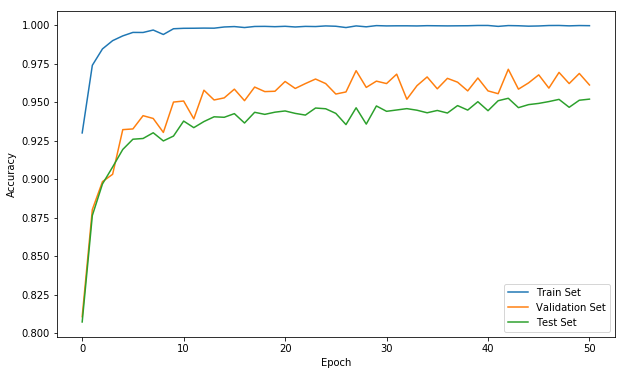

In [42]:
epoch_index = [i for i in range(EPOCHS)]
#print(epoch_index)
plt.figure('Accuracy Performance', figsize=(10,6))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch_index, train_acc_fig, label='Train Set')

#plt.figure('Validation Accuracy Performance')
plt.plot(epoch_index, valid_acc_fig, label='Validation Set')

#plt.figure('Test Accuracy Performance')
plt.plot(epoch_index, test_acc_fig, label='Test Set')
plt.legend()


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./new_signs/38_keep_right.jpg
38
./new_signs/12_priority.jpg
12
./new_signs/14_stop.jpg
14
./new_signs/13_yield.jpg
13
./new_signs/17_no_ent.jpg
17


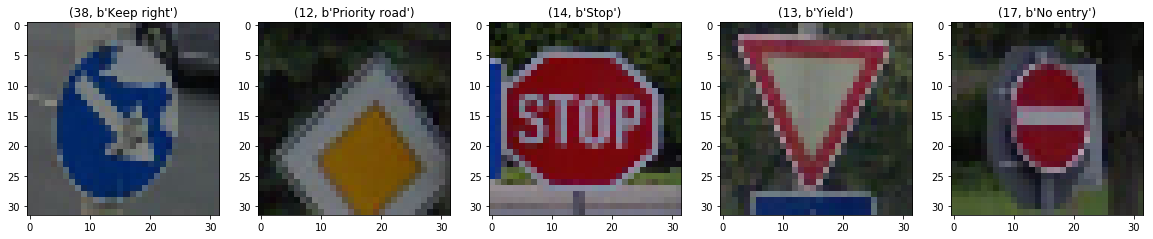

(5, 32, 32, 3)


In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Ref: https://github.com/zhuangh/CarND-LeNet-Lab/blob/master/LeNet-Lab.ipynb
#print(lenet_cfg)
    
import glob
import cv2 
import matplotlib.image as mpimg

signs_from_web = []
labels = [] 
web_images = glob.glob('./new_signs/*.jpg')
sign_names = label_name

for file in web_images:
    # get label from file, first 2 digits of filename
    print(file)
    label = int(file.split('/')[-1][:2])
    print(label)
    labels.append(label)
    img = mpimg.imread(file)
    resized_image = cv2.resize(img, (32, 32)) 
    signs_from_web.append(resized_image)

def draw_images(data, images_per_line=5, squeeze=False, cmap=None):
    for offset in range(0, len(data), images_per_line):
        batch = data[offset:offset + images_per_line]
        fig = plt.figure(figsize = (20,4))
        for i in range(len(batch)):
            axis = fig.add_subplot(1, len(batch), i + 1)
            axis.set_title(sign_names[labels[offset+i]])
            image = batch[i]
            if squeeze: 
                image = image.squeeze()
            if cmap == None: 
                axis.imshow(image)
            else: 
                axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        
draw_images(signs_from_web)
signs_from_web=np.array(signs_from_web)
print(signs_from_web.shape)
X_from_web = np.sum(signs_from_web/3, axis=3, keepdims=True)
X_from_web = (X_from_web - 128)/128
y_from_web = labels

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_from_web, y_from_web)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Analyze Performance

In [29]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("Test Accuracy for the new images = {:.2f}".format(test_accuracy))   

Test Accuracy for the new images = 1.00


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

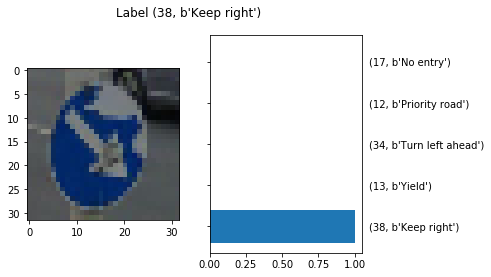

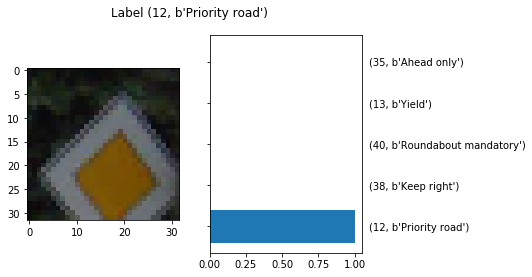

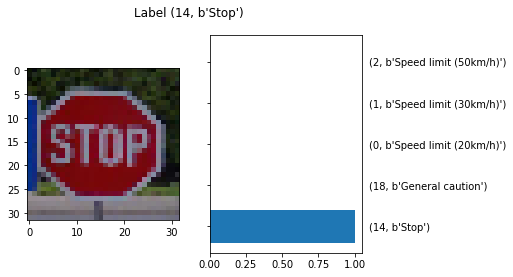

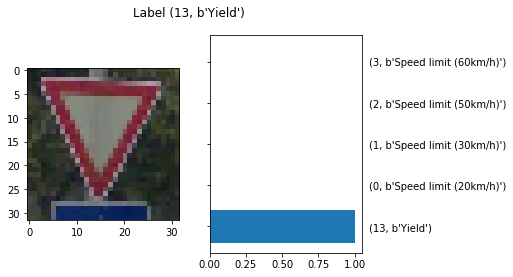

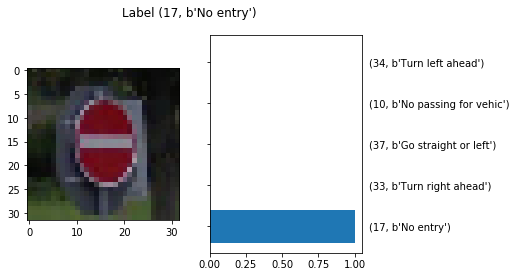

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

TOPK = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=TOPK), feed_dict={x:X_from_web, keep_prob: 1.0})


for i in range(len(web_images)):
    f, (axes1, axes2) = plt.subplots(1, 2, sharey=False, sharex=False)
    f.suptitle("Label {}".format(sign_names[labels[i]]))
    axes1.imshow(signs_from_web[i])
    axes2.barh(range(TOPK), top.values[i], align='center')
    axes2.set_yticks(range(TOPK))
    axes2.set_yticklabels(sign_names[top[1][i].astype(int)])
    axes2.tick_params(labelleft='off', labelright='on')

In [ ]:
# Get the prediction of the test set
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    y_pred = sess.run(prediction, feed_dict={x: X_test, y: y_test, keep_prob: 1.0})

Precision 0.938411592059
Recall 0.952019002375
Confusion matrix


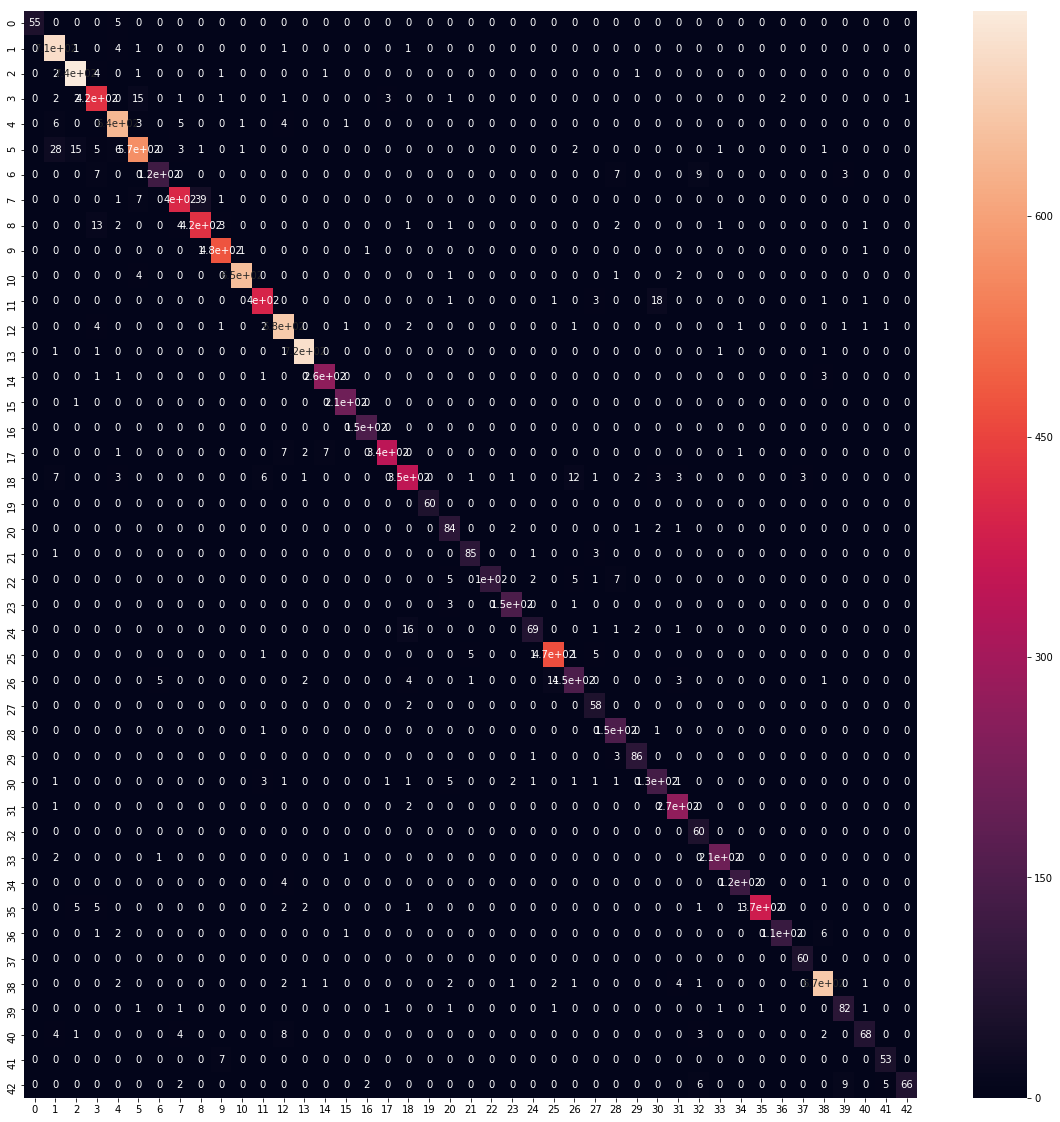

In [69]:
import seaborn as sn
from sklearn import metrics

print("Precision", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall", metrics.recall_score(y_test, y_pred, average='micro'))
cf_mat =  metrics.confusion_matrix(y_test, y_pred)

print('Confusion matrix')
plt.figure(figsize=(20,20))
sn.heatmap(cf_mat, annot=True)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.